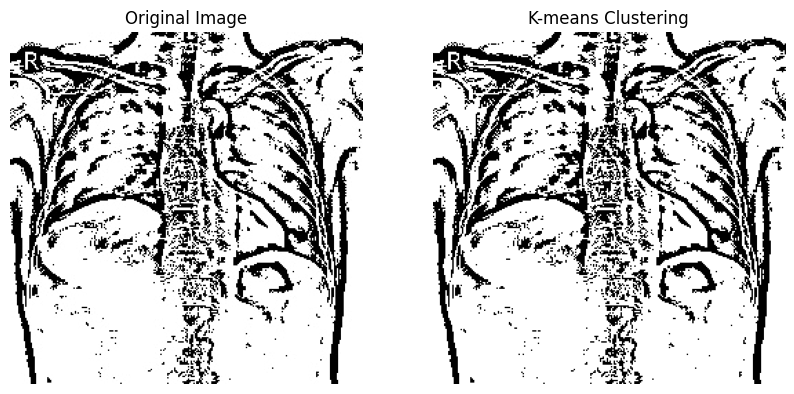

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Define directories
input_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_GaussianThreshold'
output_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Kmeans'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to apply K-means clustering and save images
def apply_kmeans_clustering(input_directory, output_directory):
    first_image = True  # Indicator for the first image
    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg"):  # Check if the file is an image
            # Read the image
            img_path = os.path.join(input_directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Flatten the image
            pixel_values = img.reshape((-1, 1))
            pixel_values = np.float32(pixel_values)

            # Apply K-means clustering
            criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
            k = 2  # Number of clusters
            _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
            
            # Convert back to 8 bit values
            centers = np.uint8(centers)

            # Map labels to center values
            segmented_image = centers[labels.flatten()]
            segmented_image = segmented_image.reshape(img.shape)

            # Save the segmented image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, segmented_image)

            # For demonstration, show the comparison for the first image only
            if first_image:
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(segmented_image, cmap='gray')
                plt.title('K-means Clustering')
                plt.axis('off')

                plt.show()
                first_image = False  # Change the flag after the first image is processed

# Apply the function
apply_kmeans_clustering(input_dir, output_dir)


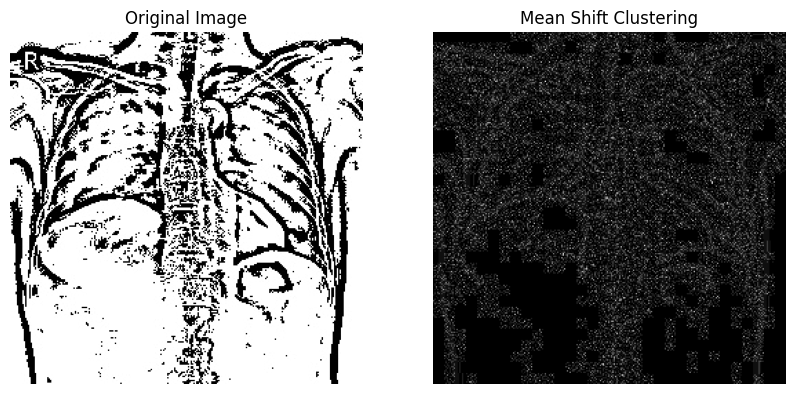

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Define directories
input_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_GaussianThreshold'
output_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_MeanShift'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to apply Mean Shift clustering and save images
def apply_mean_shift_clustering(input_directory, output_directory):
    first_image = True  # Indicator for the first image
    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg"):  # Check if the file is an image
            # Read the image
            img_path = os.path.join(input_directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Convert image to float32
            img = np.float32(img) / 255.0

            # Flatten the image
            flat_image = img.reshape((-1, 1))

            # Estimate bandwidth
            bandwidth = estimate_bandwidth(flat_image, quantile=0.1, n_samples=100)

            # Apply Mean Shift clustering
            ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
            ms.fit(flat_image)
            labels = ms.labels_

            # Reshape the result back into the image format
            segmented_image = labels.reshape(img.shape)

            # Convert to uint8 for visualization
            segmented_image = np.uint8(segmented_image * (255 / np.max(segmented_image)))

            # Save the segmented image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, segmented_image)

            # For demonstration, show the comparison for the first image only
            if first_image:
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(segmented_image, cmap='gray')
                plt.title('Mean Shift Clustering')
                plt.axis('off')

                plt.show()
                first_image = False  # Change the flag after the first image is processed

# Apply the function
apply_mean_shift_clustering(input_dir, output_dir)

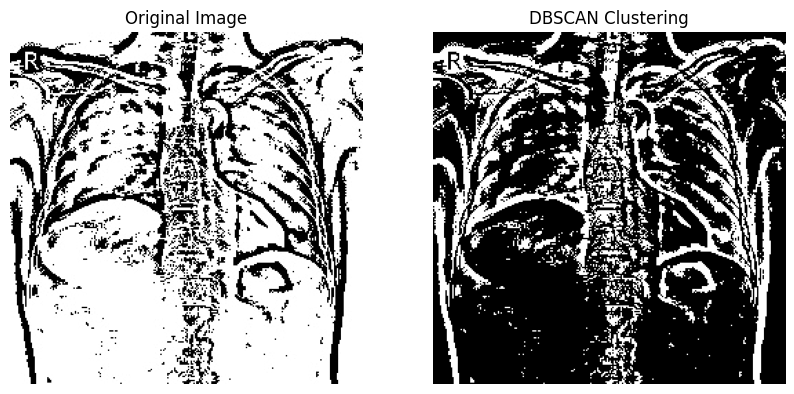

KeyboardInterrupt: 

In [4]:
# Corrected function to apply DBSCAN clustering and save images
def apply_dbscan_clustering(input_directory, output_directory):
    first_image = True  # Indicator for the first image
    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg"):  # Check if the file is an image
            # Read the image
            img_path = os.path.join(input_directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Flatten the image for clustering
            flat_image = img.reshape((-1, 1))  # Ensure it's a 2D array suitable for DBSCAN
            flat_image = np.float32(flat_image)  # DBSCAN expects float type

            # Apply DBSCAN clustering
            dbscan = DBSCAN(eps=3, min_samples=100)  # Adjust parameters as necessary
            dbscan.fit(flat_image)

            # Get labels
            labels = dbscan.labels_

            # Reshape labels to original image shape
            segmented_img = labels.reshape(img.shape)

            # Map each cluster label to the grayscale intensity
            segmented_img = np.uint8((segmented_img + 1) * (255 / (np.max(segmented_img) + 1)))  # Normalize and convert

            # Save the segmented image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, segmented_img)

            # For demonstration, show the comparison for the first image only
            if first_image:
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(segmented_img, cmap='gray')
                plt.title('DBSCAN Clustering')
                plt.axis('off')

                plt.show()
                first_image = False  # No more flags after the first image is processed

# Apply the function
apply_dbscan_clustering(input_dir, output_dir)


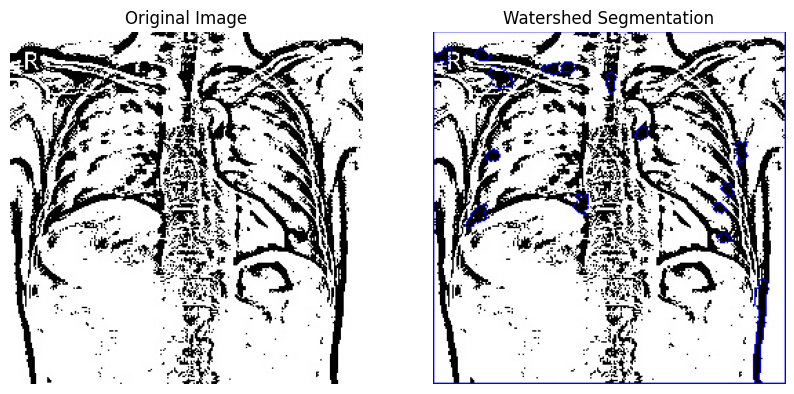

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

# Define directories
input_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_GaussianThreshold'
output_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall/Train_Watershed'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Function to apply Watershed algorithm and save images
def apply_watershed(input_directory, output_directory):
    first_image = True  # Indicator for the first image
    for filename in os.listdir(input_directory):
        if filename.endswith(".jpg"):  # Check if the file is an image
            # Read the image
            img_path = os.path.join(input_directory, filename)
            original_img = cv2.imread(img_path)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Pre-processing for Watershed
            ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            kernel = np.ones((3,3),np.uint8)
            opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
            sure_bg = cv2.dilate(opening, kernel, iterations=3)
            dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
            ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
            sure_fg = np.uint8(sure_fg)
            unknown = cv2.subtract(sure_bg, sure_fg)

            # Marker labelling
            ret, markers = cv2.connectedComponents(sure_fg)
            markers = markers + 1
            markers[unknown==255] = 0

            # Apply Watershed
            markers = cv2.watershed(original_img, markers)
            original_img[markers == -1] = [255,0,0]

            # Save the segmented image
            output_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_path, original_img)

            # For demonstration, show the comparison for the first image only
            if first_image:
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
                plt.title('Original Image')
                plt.axis('off')

                plt.subplot(1, 2, 2)
                plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
                plt.title('Watershed Segmentation')
                plt.axis('off')

                plt.show()
                first_image = False  # Change the flag after the first image is processed

# Apply the function
apply_watershed(input_dir, output_dir)


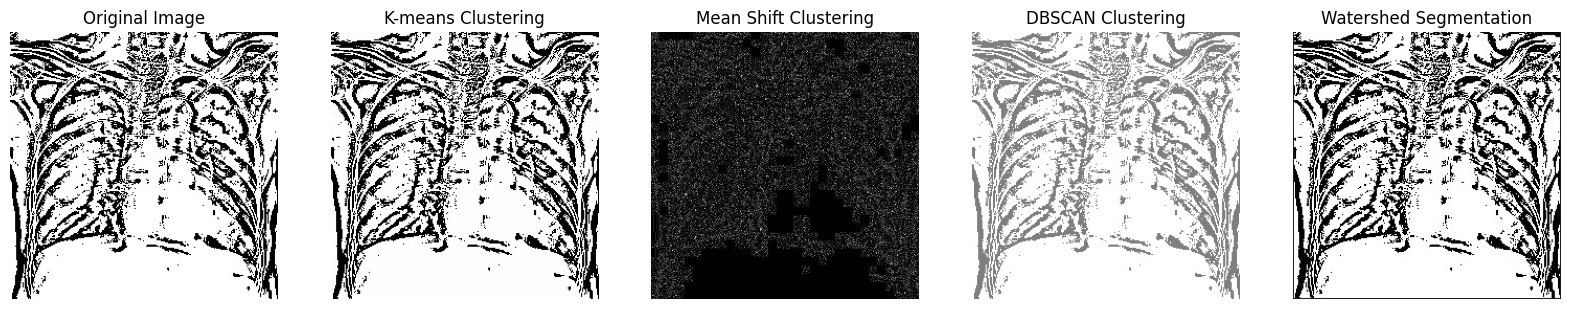

In [6]:
import cv2
import os
from matplotlib import pyplot as plt

# Define the base directory and image filename
base_dir = '/Users/nisargp/PycharmProjects/CV/Assignment /VinBigDatasetSmall'
image_filename = '9ca2725b69db57ebc2df26a7da70affb.jpg'  

# Define paths for the original and segmented images
original_img_path = os.path.join(base_dir, 'Train_GaussianThreshold', image_filename)
kmeans_img_path = os.path.join(base_dir, 'Train_Kmeans', image_filename)
meanshift_img_path = os.path.join(base_dir, 'Train_MeanShift', image_filename)
dbscan_img_path = os.path.join(base_dir, 'Train_DBSCAN', image_filename)
watershed_img_path = os.path.join(base_dir, 'Train_Watershed', image_filename)

# Function to read and convert images for display
def read_and_convert(image_path):
    # Read image in grayscale for consistency
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Convert grayscale to RGB for display in matplotlib
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Read all images
original_img = read_and_convert(original_img_path)
kmeans_img = read_and_convert(kmeans_img_path)
meanshift_img = read_and_convert(meanshift_img_path)
dbscan_img = read_and_convert(dbscan_img_path)
watershed_img = read_and_convert(watershed_img_path)

# Create a subplot of 1 row and 5 columns
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed

# Original image
plt.subplot(1, 5, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# K-means image
plt.subplot(1, 5, 2)
plt.imshow(kmeans_img)
plt.title('K-means Clustering')
plt.axis('off')

# Mean Shift image
plt.subplot(1, 5, 3)
plt.imshow(meanshift_img)
plt.title('Mean Shift Clustering')
plt.axis('off')

# DBSCAN image
plt.subplot(1, 5, 4)
plt.imshow(dbscan_img)
plt.title('DBSCAN Clustering')
plt.axis('off')

# Watershed image
plt.subplot(1, 5, 5)
plt.imshow(watershed_img)
plt.title('Watershed Segmentation')
plt.axis('off')

# Display the plot
plt.show()
